In [34]:
import pandas as pd
import json
import numpy as np
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [35]:
file = 'Resources/Chicago_temp_and_cases_data_df.csv'
total_case_data_Chi = pd.read_csv(file)
total_case_data_Chi.head()

,dt_iso,city_name,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,totalcases,totaldeaths
0,3/18/2020,Chicago,41.878114,-87.629798,40.43,32.825667,38.399000,42.311000,1019.666667,70.800000,7.268000,162,1
1,3/19/2020,Chicago,41.878114,-87.629798,43.08,36.438537,40.516829,45.446585,1014.097561,96.926829,8.807561,184,2
2,3/20/2020,Chicago,41.878114,-87.629798,47.29,38.211667,43.529167,50.398750,1011.875000,85.375000,14.475000,155,0
3,3/21/2020,Chicago,41.878114,-87.629798,30.19,17.966250,28.536250,32.004583,1032.375000,61.541667,12.611667,125,2
4,3/22/2020,Chicago,41.878114,-87.629798,30.49,21.055926,28.730370,32.875185,1029.888889,67.370370,8.061111,169,2


In [36]:
total_case_data_Chi.columns

Index(['dt_iso', 'city_name', 'lat', 'lon', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'humidity', 'wind_speed', 'totalcases',
       'totaldeaths'],
      dtype='object')

In [37]:
total_case_data_Chi.dtypes

dt_iso          object
city_name       object
lat            float64
lon            float64
temp           float64
feels_like     float64
temp_min       float64
temp_max       float64
pressure       float64
humidity       float64
wind_speed     float64
totalcases       int64
totaldeaths      int64
dtype: object

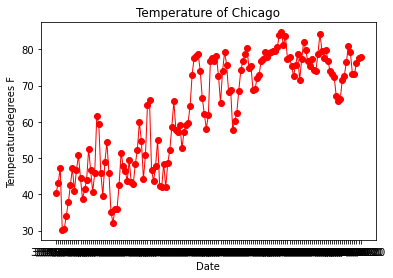

In [38]:
xvalue = total_case_data_Chi['dt_iso'].astype(str)
yvalue = total_case_data_Chi['temp']
cases = total_case_data_Chi['totalcases']
plt.plot(xvalue, yvalue, marker='o', color='red', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Temperature' 
           'degrees F')

plt.title('Temperature of Chicago')
plt.savefig('Resources/Temperature_of_Chi.jpg')
plt.show()
           

In [39]:
temperatures =  total_case_data_Chi['temp']
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.075
The upper quartile of temperatures is: 76.745
The interquartile range of temperatures is: 28.67
The the median of temperatures is: 66.2 
Values below 5.07 could be outliers.
Values above 119.75 could be outliers.


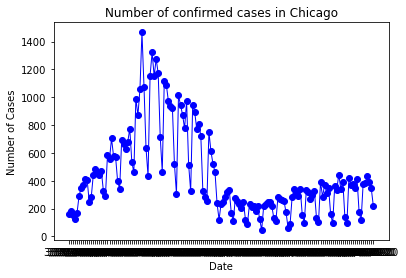

In [40]:
xvalue = total_case_data_Chi['dt_iso']

cases = total_case_data_Chi['totalcases']
plt.plot(xvalue, cases, marker='o', color='blue', linewidth=1)

plt.xlabel('Date')
plt.ylabel('Number of Cases') 
plt.savefig('Resources/Cases_and_dates_for_Chi.jpg')          
plt.title('Number of confirmed cases in Chicago')
plt.savefig('Resources/Number_of_total_cases_Chicago.jpg')

plt.show()

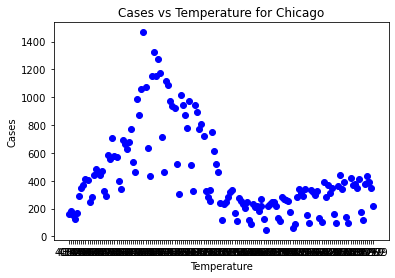

In [46]:
yvalue = total_case_data_Chi['temp'].astype(str)
cases = cases = total_case_data_Chi['totalcases']
plt.scatter(yvalue, cases, marker='o', color='blue',)
plt.xlabel('Temperature')
plt.ylabel('Cases')
plt.title('Cases vs Temperature for Chicago')
plt.savefig('Resources/Cases_vs_Temperature_for_Chicago_scatter.jpg')
plt.show()


In [42]:
correlations = total_case_data_Chi.corr()
correlations

,lat,lon,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,totalcases,totaldeaths
lat,1.000000e+00,1.000000e+00,2.646128e-16,7.704954e-17,-1.807337e-17,1.050689e-15,3.324276e-14,3.385882e-16,1.645825e-15,7.841486e-16,2.935005e-16
lon,1.000000e+00,1.000000e+00,3.209311e-16,8.231788e-18,2.538878e-16,1.183097e-15,3.324276e-14,7.132925e-16,1.733288e-15,6.988935e-16,2.938950e-16
temp,2.646128e-16,3.209311e-16,1.000000e+00,9.936888e-01,9.978351e-01,9.987867e-01,-2.378953e-01,-2.174143e-01,-2.774329e-01,-4.797722e-01,-5.205228e-01
feels_like,7.704954e-17,8.231788e-18,9.936888e-01,1.000000e+00,9.925936e-01,9.929681e-01,-2.373961e-01,-1.427648e-01,-3.453236e-01,-4.797497e-01,-5.437237e-01
temp_min,-1.807337e-17,2.538878e-16,9.978351e-01,9.925936e-01,1.000000e+00,9.944928e-01,-2.322727e-01,-2.053266e-01,-2.646187e-01,-4.919205e-01,-5.384209e-01
temp_max,1.050689e-15,1.183097e-15,9.987867e-01,9.929681e-01,9.944928e-01,1.000000e+00,-2.370465e-01,-2.150250e-01,-2.908580e-01,-4.749500e-01,-5.168608e-01
pressure,3.324276e-14,3.324276e-14,-2.378953e-01,-2.373961e-01,-2.322727e-01,-2.370465e-01,1.000000e+00,-3.442045e-01,-2.815917e-01,-1.448601e-01,-7.270936e-02
humidity,3.385882e-16,7.132925e-16,-2.174143e-01,-1.427648e-01,-2.053266e-01,-2.150250e-01,-3.442045e-01,1.000000e+00,2.577434e-02,1.142457e-01,-4.092843e-02
wind_speed,1.645825e-15,1.733288e-15,-2.774329e-01,-3.453236e-01,-2.646187e-01,-2.908580e-01,-2.815917e-01,2.577434e-02,1.000000e+00,1.388697e-01,2.502555e-01
totalcases,7.841486e-16,6.988935e-16,-4.797722e-01,-4.797497e-01,-4.919205e-01,-4.749500e-01,-1.448601e-01,1.142457e-01,1.388697e-01,1.000000e+00,7.531323e-01


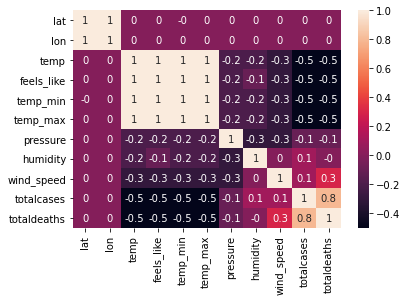

In [43]:
sns.heatmap(correlations.round(1), annot=True)
plt.savefig('Resources/heat_map_Chi_data.jpg')

The r-squared is: 0.23018140973843879


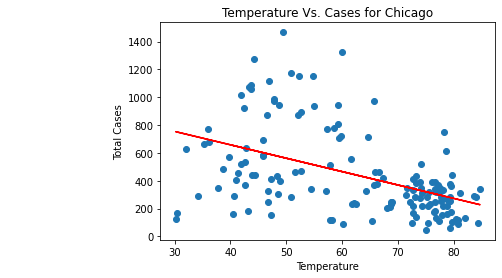

In [44]:
x_values = total_case_data_Chi['temp']
y_values = total_case_data_Chi['totalcases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Temperature')
plt.ylabel('Total Cases')
plt.title('Temperature Vs. Cases for Chicago')
plt.savefig('Resources/Temperature_vs_Cases_for_Chicago_line_regress.jpg')
print(f"The r-squared is: {rvalue**2}")
plt.show()